<p style="color: #E43F6F; font-size: 25px;text-align: center"><strong>TP 5: Analysing data</strong></p>

<span style="font-size: 18px;margin-bottom:0"><strong>Objectives:</strong></span>
<ul style="list-style: none">
  <li><span style="font-size:11px"> ▶</span> compute the Fourier transform of a signal,</li>
  <li><span style="font-size:11px"> ▶</span> generate random variables and measure their statistical properties,</li>
  <li><span style="font-size:11px"> ▶</span> compute and manipulate histograms,</li>
  <li><span style="font-size:11px"> ▶</span> use special functions and physical constants,</li>
  <li><span style="font-size:11px"> ▶</span> fit a set of data with a function,</li>
  <li><span style="font-size:11px"> ▶</span> read and write data (text or figures).</li>
</ul>

<span style="color: #E43F6F; font-size: 22px;"><strong>I. Fourier transform</strong></span>

<span style="color: #AB68B2; font-size: 18px; margin-left: 2em;"><i>1) Mathematical reminders</i></span>

You can also consult <strong>§IV.1.1</strong> of the lectures notes for another presentation.

<span style="color: #1BBAC6; font-size: 16px; margin-left: 4em;"><i>a) Definitions and conventions</i></span>

The Fourier transform generalizes the Fourier series to non-periodic functions. 

Let $s(t)$ be a time-dependent signal (real or complex) and $\tilde{s}(f)$ its Fourier transform: 
$$\displaystyle \tilde{s}(f)=\int_{-\infty}^{+\infty}\mathrm{d}t\,s(t)e^{-\mathrm{i}2\pi ft}.$$ 

The Fourier transform is invertible:

$$\displaystyle s(t)=\int_{-\infty}^{+\infty}\mathrm{d}f\,\tilde{s}(f)e^{\mathrm{i}2\pi ft}.$$

In practice, we can never measure the entire signal, we only have a <span style="color: #AB68B2;"><i>finite number of samples</i></span>. In other words, the value of $s(t)$ is only known at a finite number $N$ of points regularly spaced by $\delta t$ ($f_\mathrm{s}=1/\delta t$ is the sampling frequency). Thus, $s_k \equiv s(t_k)$, with $t_k \equiv k\delta t$, and $k = 0, \dots , N − 1$.

Trying to apply the Fourier transform to such a signal (by approximating the integral by a Riemann sum) would yield:
$$\tilde{s}(f)=\delta ts_0e^{-\mathrm{i}2\pi f(0\times \delta t)}+\delta ts_1e^{-\mathrm{i}2\pi f(\delta t)}+\dots \delta ts_k e^{-\mathrm{i}2\pi f(k\delta t)}+\dots +\delta ts_{N-1}e^{-\mathrm{i}2\pi f[(N-1)\delta t]}=\delta t\sum_{k=0}^{N-1}s_ke^{-\mathrm{i}2\pi k f \delta t}.$$
It is then obvious that $\tilde{s}(f+f_\mathrm{s})=\tilde{s}(f+1/\delta t)=\tilde{s}(f)$. Said differently, because of the time sampling, the Fourier transform is now periodic of period equal to the sampling frequency $f_\mathrm{s}$. Therefore, we can restrict ourselves to the frequency range $[-1/(2\delta t),\, 1/(2\delta t)[$. We note that the maximum frequency we can probe is half the sampling frequency. <strong> The total frequency range that you can probe is inversely proportional to the time discretization: the smaller the time discretization, the larger the frequency range!</strong>

Moreover, you cannot evaluate the above formula for any frequency $f\in\mathbb{R}$, because your signal is not infinitely long. Indeed, very loosely speaking, the Fourier transform $\tilde{s}(f)$ measures the amount of oscillation of the signal at frequency $f$. Because the total duration of the signal is $N\delta t$, you cannot detect oscillatory patterns of period larger than $N\delta t$, and consequently you cannot probe frequencies smaller than $1/(N\delta t)$ (except $f=0$ of course). In other words, <strong> the minimum strictly positive frequency you can probe (which corresponds to your frequency resolution) is inversely proportional to the total duration of the signal: the longer the signal, the thinner the frequency resolution!</strong> 

It turns out that you do not need to compute the $\tilde{s}(f)$ for all frequencies $f\in[-1/(2\delta t),\, -1/(N\delta t)]\times\lbrace0\rbrace\times[1/(N\delta t),\,1/(2\delta t)[$. You just need to evaluate the Fourier transform for $N$ discrete frequencies $$
f_n=\begin{cases}\displaystyle \frac{n}{N\delta t}\quad \text{for}\quad n=0,\dots,N/2-1,\\[0.8em]
\displaystyle \frac{n-N}{N\delta t}\quad \text{for}\quad n=N/2,..,N-1.
\end{cases}$$
The value of the Fourier transform for these $N$ discrete frequencies is then given by the <span style="color: #AB68B2;"><i>Discrete Fourier Transform</i></span> (DFT):
$$\tilde s_n=\sum_{k=0}^{N-1}s_ke^{-\mathrm{i}2\pi kn/N}.$$
(We have removed the multiplicative factor if you compare with the previous equation.)

The reason why we can restrict ourselves to these $N$ discrete frequencies is because the DFT is invertible, and that you can resconstruct the original signal from it:
$$s_k=\dfrac{1}{N}\sum_{n=0}^{N-1}\tilde s_ne^{\mathrm{i}2\pi kn/N}.$$
This formula looks very similar to the inverse Fourier transform for infinitely-long time-continuous signals.

<span style="color: #1BBAC6; font-size: 16px; margin-left: 4em;"><i>b) Spectrum of a signal</i></span>

Because the DFT is a complex number, one usually considers the <span style="color: #AB68B2;"><i>spectrum</i></span> $\vert\tilde s(f)\vert$ of a signal defined as the modulus of the DFT. The power spectrum is defined as the squared spectrum $\mathcal{S}(f)=\vert\tilde s(f)\vert^2$. Loosely speaking, the power spectrum is a strictly positive quantity which tells you the amount of "energy" in your signal at each frequency. This "energy" interpretation can be made more obvious thanks to the Plancherel-Parseval theorem:
$$\sum_{k=0}^{N-1}\vert s_k\vert^2=\frac{1}{N}\sum_{n=0}^{N-1}\vert\tilde s_n\vert^2.$$

<span style="color: #1BBAC6; font-size: 16px; margin-left: 4em;"><i>c) Aliasing</i></span>

As mentioned above, the time sampling of a continuous-time signal $s(t)$ results in a periodic Fourier transform of period $f_\mathrm{s}$ (the sampling frequency). 

Consequently, the DFT is a good approximate of the Fourier transform $\tilde{s}(f)$ of the original signal only if $\tilde{s}(f)$ is periodic of period $f_\mathrm{s}$. Obviously, this is verified if $\tilde{s}(f)$ vanishes for $\vert{f}\vert>f_\mathrm{s}/2$, or if the maximum frequency $f_\mathrm{max}$ (in absolute value) in the Fourier transform of $s(t)$ is such that $f_\mathrm{max}<f_\mathrm{s}/2$. <strong> We recover the Nyquist-Shannon sampling theorem, which tells you that if you want to reconstruct a signal, you have to choose the sampling frequency such that it is twice larger than the maximum frequency in the spectrum of the signal you want to reconstruct.</strong>

If the above condition is not verified, <i>i.e.,</i> if the Fourier transform presents frequencies larger than $f_\mathrm{s}/2$, then ghosts will appear in the DFT. This phenomenon is called <span style="color: #AB68B2;"><i>aliasing</i></span>. Frequencies $f>f_\mathrm{s}/2$ will "fold" back in the range $[-f_\mathrm{s}/2,\, f_\mathrm{s}/2[$ and will appear as ghosts of frequencies $\pm f+pf_\mathrm{s}$ with $p\in\mathbb{Z}$. In other words, frequencies above the Nyquist frequency pollute the spectrum obtained by DFT at lower frequencies, and the inverse DFT no longer allows the original discrete signal to be recovered.

<span style="color: #AB68B2; font-size: 18px; margin-left: 2em;"><i>2) Calculation with NumPy</i></span>

<span style="color: #1BBAC6; font-size: 16px; margin-left: 4em;"><i>a) The algorithm</i></span>

The algorithm used to compute DFTs in Python is called <span style="color: #AB68B2;"><i>the Fast Fourier Transform (FFT)</i></span> algorithm. Because this algorithm is heavily used to compute DFTs, people often talk about FFTs rather than DFTs.

<span style="color: #1BBAC6; font-size: 16px; margin-left: 4em;"><i>b) Implementation</i></span>

The calculation of the DFT of a signal is done via the function <tt>fft</tt> of the <span style="color: #AB68B2;"><i>fft module in the NumPy package</i></span>. The frequencies at which the DFT is calculated can be returned by the function <tt>fftfreq</tt>. The module fft has other functions which will not be discussed in this notebook, but you can consult the documentation for more information: https://numpy.org/doc/stable/reference/routines.fft.html
<table style="border: none;">
  <tr>
    <td style="vertical-align: middle;">
      <img src="programming.png" width="40">
    </td>
    <td style="vertical-align: middle; padding-left: 10px; text-align: center">
      <span style="color: #CF7EA0; font-size:16px;"><strong> Run the code below to understand how to compute Discrete Fourier Transforms in Python. Add appropriate comments when required.</strong></span>
    </td>
  </tr>
</table>

[ 0.96592583  0.62932039  0.05233596 -0.54463904 -0.93358043 -0.96592583
 -0.62932039 -0.05233596  0.54463904  0.93358043  0.96592583  0.62932039
  0.05233596 -0.54463904 -0.93358043 -0.96592583 -0.62932039 -0.05233596
  0.54463904  0.93358043]
[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5 -5.  -4.5 -4.  -3.5
 -3.  -2.5 -2.  -1.5 -1.  -0.5]
[-9.15933995e-16+0.00000000e+00j  5.31206036e-16+5.47139420e-16j
  9.65925826e+00+2.58819045e+00j  1.02445208e-16+2.96954702e-16j
 -3.75407804e-18-4.25081434e-16j -1.42247325e-15-2.63677968e-15j
  3.55271368e-15-2.22044605e-16j  1.34752308e-15+7.41333566e-16j
  4.61721076e-16+1.16000227e-15j -1.11381259e-15+2.57281702e-15j
 -2.03157104e-15+7.66340450e-17j -1.11381259e-15-2.57281702e-15j
  4.61721076e-16-1.16000227e-15j  1.34752308e-15-7.41333566e-16j
  2.25961514e-15+3.24829789e-16j -1.42247325e-15+2.63677968e-15j
 -3.75407804e-18+4.25081434e-16j  1.02445208e-16-2.96954702e-16j
  9.65925826e+00-2.58819045e+00j  5.31206036e-16-5.47139420e-16j]


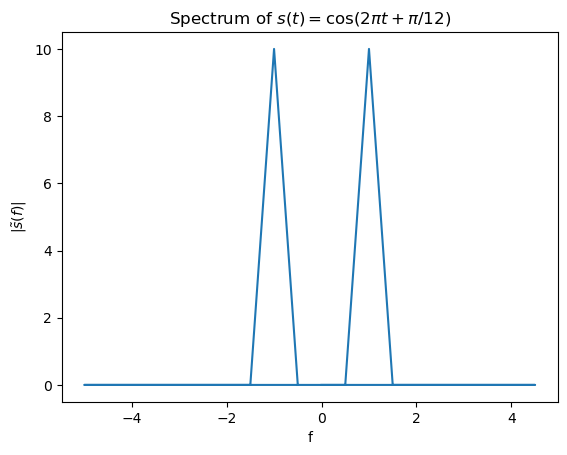

In [1]:
import numpy as np
import matplotlib.pyplot as plt
dt = 0.1  # Time interval between two samples.
fc = 1. / dt  # Sampling frequency.
f0 = 1.  # Frequency of the signal.
T0 = 1. / f0  # Period of the signal.
t = np.arange(0., 2 * T0, dt)  # Creates an array of time of total duration twice the period and of time discretization dt.
# This simulates the process of time sampling.
s = np.cos(2. * np.pi * f0 * t + np.pi / 12.)  # Synthetic signal.
print(s)

tilde_s = np.fft.fft(s)  # Computes the DFT of s.
freq = np.fft.fftfreq(s.size, dt)  # Computes the frequencies at which the DFT is evaluated. Two inputs: the number of samples,
# and the time discretization.
print(freq)  # The frequencies are in a particular order: first the positive frequencies in increasing order, then the negative
# frequencies also in increasing order.
print(tilde_s)  # The DFT is an array of complex numbers.

plt.figure()
plt.plot(freq, np.abs(tilde_s))  # The DFT is an array of complex numbers so we need to take the modulus to plot it.
plt.xlabel('f')
plt.ylabel(r'$\vert\tilde{s}(f)\vert$')
plt.title(r'Spectrum of $s(t)=\cos(2\pi t + \pi/12)$')
plt.show()

<table style="border: none;">
  <tr>
    <td style="vertical-align: middle;">
      <img src="sharing.png" width="40">
    </td>
    <td style="vertical-align: middle; padding-left: 10px;">
      <span style="color: #CF7EA0; font-size:16px;"><strong> What is the value of the Discrete Fourier Transform for a cosine (or sine) function?</strong></span>
    </td>
  </tr>
</table>

<ul style="list-style: none">
  <li><span style="font-size:11px"> ▶</span> The modulus of the DFT is equal to half the number of samples for a cosine (or sine) function when the frequency equals the frequency of the signal or its opposite, and otherwise it is equal to 0.</li>
</ul>

[-5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5
  2.   2.5  3.   3.5  4.   4.5]
[-2.03157104e-15+7.66340450e-17j -1.11381259e-15-2.57281702e-15j
  4.61721076e-16-1.16000227e-15j  1.34752308e-15-7.41333566e-16j
  2.25961514e-15+3.24829789e-16j -1.42247325e-15+2.63677968e-15j
 -3.75407804e-18+4.25081434e-16j  1.02445208e-16-2.96954702e-16j
  9.65925826e+00-2.58819045e+00j  5.31206036e-16-5.47139420e-16j
 -9.15933995e-16+0.00000000e+00j  5.31206036e-16+5.47139420e-16j
  9.65925826e+00+2.58819045e+00j  1.02445208e-16+2.96954702e-16j
 -3.75407804e-18-4.25081434e-16j -1.42247325e-15-2.63677968e-15j
  3.55271368e-15-2.22044605e-16j  1.34752308e-15+7.41333566e-16j
  4.61721076e-16+1.16000227e-15j -1.11381259e-15+2.57281702e-15j]


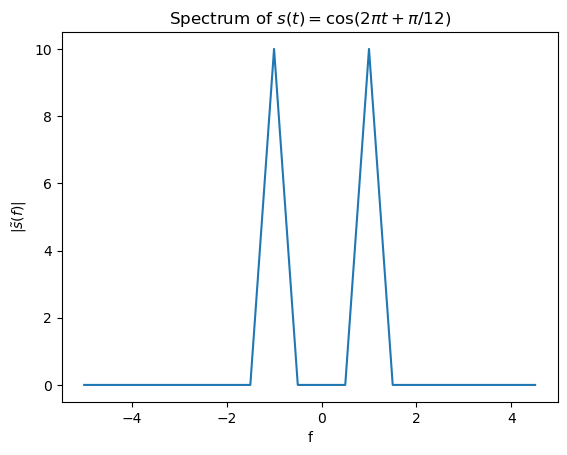

In [2]:
tilde_s = np.fft.fftshift(np.fft.fft(s))
freq = np.fft.fftshift(np.fft.fftfreq(s.size, dt))
print(freq)  # The function fftshift sorts the values of the array such that the frequencies are in increasing order.
print(tilde_s)

plt.figure()
plt.plot(freq, np.abs(tilde_s))
plt.xlabel('f')
plt.ylabel(r'$\vert\tilde{s}(f)\vert$')
plt.title(r'Spectrum of $s(t)=\cos(2\pi t + \pi/12)$')
plt.show()

<table style="border: none;">
  <tr>
    <td style="vertical-align: middle;">
      <img src="sharing.png" width="40">
    </td>
    <td style="vertical-align: middle; padding-left: 10px;">
      <span style="color: #CF7EA0; font-size:16px;"><strong> What is the interest of the function <tt>fftshift</tt>?</strong></span>
    </td>
  </tr>
</table>

<ul style="list-style: none">
  <li><span style="font-size:11px"> ▶</span> This function sorts the array elements so that the frequencies are in increasing order: this is better to plot the spectrum afterwards (no line going from the right to the left in the plot);</li>
  <li><span style="font-size:11px"> ▶</span> Be careful that the function must be applied to the array of frequencies and the array of the DFT.</li>
</ul>

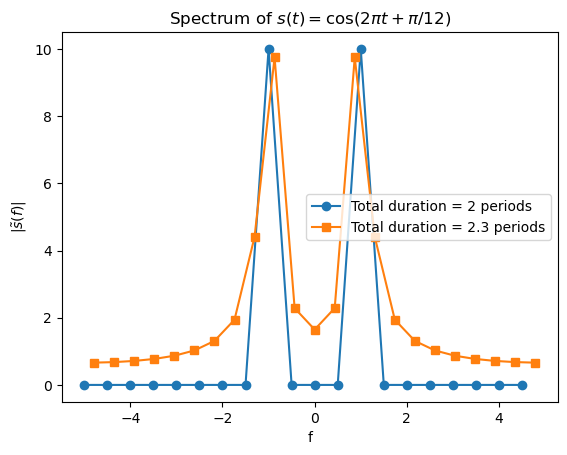

In [3]:
dt = 0.1
fc = 1. / dt
f0 = 1.
T0 = 1. / f0
t1 = np.arange(0., 2 * T0, dt)  # Creates an array of time of total duration twice the period and of time discretization dt.
s1 = np.cos(2. * np.pi * f0 * t1 + np.pi / 12.)
t2 = np.arange(0., 2.3 * T0, dt)  # Creates an array of time of total duration 2.3 times the period and of time discretization dt.
s2 = np.cos(2. * np.pi * f0 * t2 + np.pi / 12.)

tilde_s1 = np.fft.fftshift(np.fft.fft(s1))
freq1 = np.fft.fftshift(np.fft.fftfreq(s1.size, dt))
tilde_s2 = np.fft.fftshift(np.fft.fft(s2))
freq2 = np.fft.fftshift(np.fft.fftfreq(s2.size, dt))

plt.figure()
plt.plot(freq1, np.abs(tilde_s1), '-o', label='Total duration = 2 periods')
plt.plot(freq2, np.abs(tilde_s2), '-s', label='Total duration = 2.3 periods')
plt.xlabel('f')
plt.ylabel(r'$\vert\tilde{s}(f)\vert$')
plt.title(r'Spectrum of $s(t)=\cos(2\pi t + \pi/12)$')
plt.legend()
plt.show()

<table style="border: none;">
  <tr>
    <td style="vertical-align: middle;">
      <img src="sharing.png" width="40">
    </td>
    <td style="vertical-align: middle; padding-left: 10px; text-align:center">
      <span style="color: #CF7EA0; font-size:16px;"><strong> What is the effect on the Discrete Fourier Transform of sampling a periodic function on a total duration which is not an integer multiple of its period?</strong></span>
    </td>
  </tr>
</table>

<ul style="list-style: none">
  <li><span style="font-size:11px"> ▶</span> This enlarges the width of the peaks in the spectrum: in other words, you have a non-zero DFT for multiple frequencies close to the actual frequency of the signal.</li>
</ul>

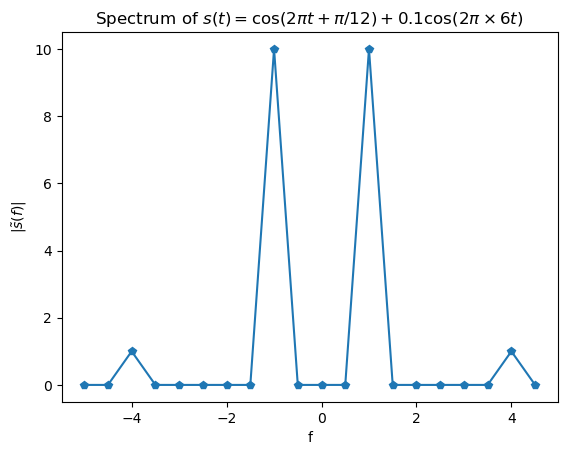

In [4]:
dt = 0.1
fc = 1. / dt
f0 = 1.
f1 = 6.
T0 = 1. / f0
T1 = 1. / f1
t = np.arange(0., 2 * T0, dt)
s = np.cos(2. * np.pi * f0 * t + np.pi / 12.) + 0.1 * np.cos(2. * np.pi * f1 * t)

tilde_s = np.fft.fftshift(np.fft.fft(s))
freq = np.fft.fftshift(np.fft.fftfreq(s.size, dt))

plt.figure()
plt.plot(freq, np.abs(tilde_s), '-p')
plt.xlabel('f')
plt.ylabel(r'$\vert\tilde{s}(f)\vert$')
plt.title(r'Spectrum of $s(t)=\cos(2\pi t + \pi/12) + 0.1\cos(2\pi\times 6t)$')
plt.show()

<table style="border: none;">
  <tr>
    <td style="vertical-align: middle;">
      <img src="sharing.png" width="40">
    </td>
    <td style="vertical-align: middle; padding-left: 10px; text-align:center">
      <span style="color: #CF7EA0; font-size:16px;"><strong> Can you rationalize the output of the above cell?</strong></span>
    </td>
  </tr>
</table>

<ul style="list-style: none">
  <li><span style="font-size:11px"> ▶</span> If we were recording the sample with an infinitely small sampling time interval, we would observe 2 peaks of amplitude <tt>t.size/2=10</tt> at frequencies $\pm\,f_0=\pm1$, and 2 peaks of amplitude <tt>t.size/2*0.1=1</tt> at frequencies $\pm\,f_1=\pm 6$;</li>
  <li><span style="font-size:11px"> ▶</span> However, because the sampling frequency is $f_\mathrm{s}=10$, we can only measure the spectrum for frequencies in the range $[-f_\mathrm{s}/2,\,f_\mathrm{s}/2[$, and we thus observe the aliasing phenomenon;</li>
  <li><span style="font-size:11px"> ▶</span> This is why we observe ghost peaks at frequencies $\pm f_\mathrm{c}\pm f_1=\pm 4$.</li>
</ul>

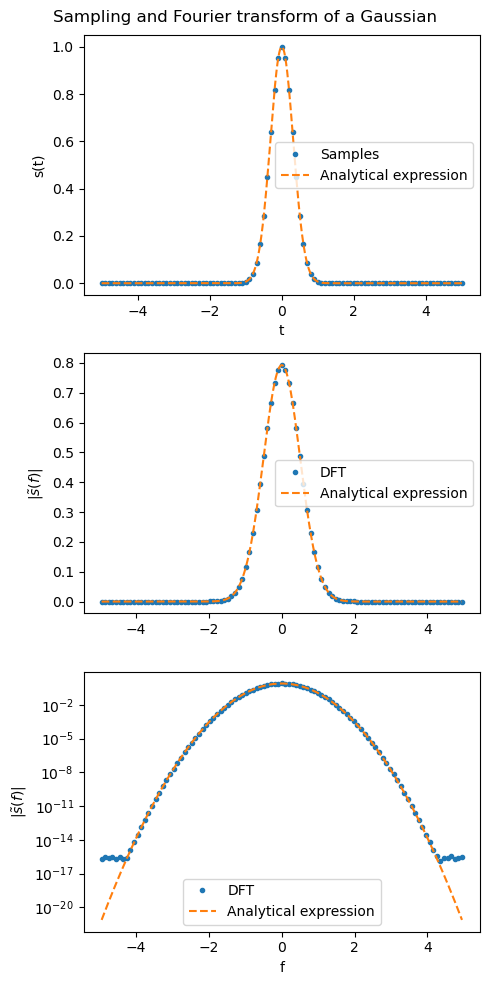

In [5]:
alpha = 5.
t = np.linspace(-5., 5., 101)
s = np.exp(-alpha * t ** 2)  # We compute the DFT of a Gaussian, which is not a periodic function.
tt = np.linspace(t[0], t[-1], 1001)
ss = np.exp(-alpha * tt ** 2)

tilde_s = np.fft.fftshift(np.fft.fft(s))
tilde_s *= (t[1] - t[0])  # To go from the DFT to the Fourier transform, we multiply by the time sampling.
freq = np.fft.fftshift(np.fft.fftfreq(t.size, t[1] - t[0]))

ff = np.linspace(freq[0], freq[-1], 1001)  # We create an array of values of f in the same range to compute the analytical prediction.
tilde_ss = np.sqrt(np.pi / alpha) * np.exp(- ff ** 2 * np.pi ** 2 / alpha)  # Analytical result for the Fourier transform of the Gaussian.

plt.figure(figsize=(5, 10))  # figsize allows you to give the width and height of the figure in inches (1 inch = 2.54 cm).
plt.subplot(3, 1, 1)
plt.plot(t, s, '.', label='Samples')
plt.plot(tt, ss, '--', label='Analytical expression')
plt.xlabel('t')
plt.ylabel('s(t)')
plt.legend()
plt.subplot(3, 1, 2)
plt.plot(freq, np.absolute(tilde_s), '.', label='DFT')
plt.plot(ff, np.absolute(tilde_ss), '--', label='Analytical expression')
plt.legend()
plt.ylabel(r'$\vert\tilde{s}(f)\vert$')
plt.subplot(3, 1, 3)
plt.plot(freq, np.absolute(tilde_s), '.', label='DFT')
plt.plot(ff, np.absolute(tilde_ss), '--', label='Analytical expression')
plt.yscale('log')
plt.legend()
plt.ylabel(r'$\vert\tilde{s}(f)\vert$')
plt.xlabel('f')
plt.suptitle('Sampling and Fourier transform of a Gaussian')
plt.tight_layout()
plt.show()

<table style="border: none;">
  <tr>
    <td style="vertical-align: middle;">
      <img src="sharing.png" width="40">
    </td>
    <td style="vertical-align: middle; padding-left: 10px; text-align:center">
      <span style="color: #CF7EA0; font-size:16px;"><strong> How does the result change with the number of samples?</strong></span>
    </td>
  </tr>
</table>

<ul style="list-style: none">
  <li><span style="font-size:11px"> ▶</span> The result gets better when we increase the number of samples;</li>
  <li><span style="font-size:11px"> ▶</span> This is obvious in real space: for small number of samples, the peak of the Gaussian is not well captured;</li>
  <li><span style="font-size:11px"> ▶</span> The error in the Fourier transform is larger at large frequencies but decreases with the number of samples (visible in logarithmic scale).</li>
</ul>

<span style="color: #E43F6F; font-size: 22px;"><strong>II. Random numbers</strong></span>

<span style="color: #AB68B2; font-size: 18px; margin-left: 2em;"><i>1) Generate random numbers</i></span>

The NumPy package has a module <span style="color: #AB68B2;"><i>random</i></span> which allows you to draw random numbers from different probability distributions. You can look at the documentation for the full list of distributions available: https://numpy.org/doc/stable/reference/random/generator.html

To be more precise, all the functions of this module are pseudo-random number generators because they create deterministic arrays of samples which follow approximately the target probability distribution. These arrays are created from an integer, called <span style="color: #AB68B2;"><i>a seed</i></span>.

<table style="border: none;">
  <tr>
    <td style="vertical-align: middle;">
      <img src="programming.png" width="40">
    </td>
    <td style="vertical-align: middle; padding-left: 10px; text-align: center">
      <span style="color: #CF7EA0; font-size:16px;"><strong> Run the code below which illustrates how to draw random numbers with a target distribution in Python. Add appropriate comments when required.</strong></span>
    </td>
  </tr>
</table>

[0.01357153 0.01387734 0.05487505 0.59008813 0.13426276 0.34456303
 0.97809654 0.44544888 0.81064889 0.18051005]


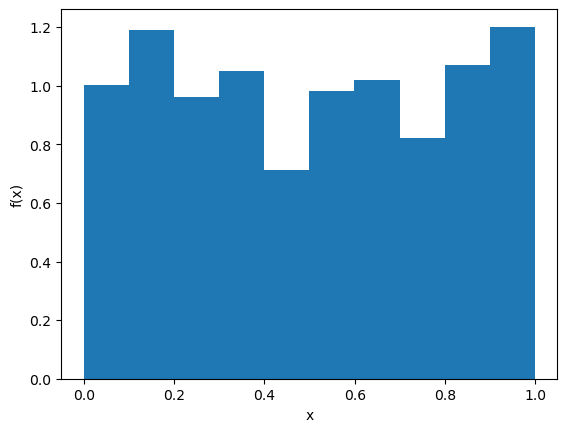

In [6]:
x = np.random.random(1000)  # Draw 1000 samples from a uniform distribution between 0 (inclusive) and 1 (exclusive).
print(x[:10])
plt.hist(x, density=True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

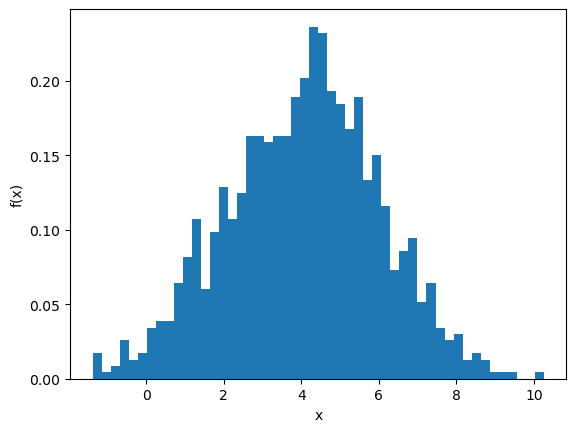

In [7]:
x = np.random.normal(4., 2., 1000)  # Draw 1000 samples from a Gaussian distribution of mean 4 and standard deviation 2.
plt.hist(x, bins=50, density=True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

In [8]:
np.random.seed(19680801)  # Impose the seed value to 19680801.
x = np.random.random(10)
print(x)
y = np.random.random(10)
print(y)
np.random.seed(19680801)
z = np.random.random(10)  # We have fixed the seed to the same value as in the beginning and so we generate the same random numbers.
# This is important when you have to debug a code which involves random numbers.
print(z)

[0.7003673  0.74275081 0.70928001 0.56674552 0.97778533 0.70633485
 0.24791576 0.15788335 0.69769852 0.71995667]
[0.25774443 0.34154678 0.96876117 0.6945071  0.46638326 0.7028127
 0.51178587 0.92874137 0.7397693  0.62243903]
[0.7003673  0.74275081 0.70928001 0.56674552 0.97778533 0.70633485
 0.24791576 0.15788335 0.69769852 0.71995667]


<span style="color: #AB68B2; font-size: 18px; margin-left: 2em;"><i>2) Compute statistical properties</i></span>

When we work with random numbers, we are often interested in their statistical properties, like <span style="color: #AB68B2;"><i>their distribution</i></span>, or more reasonably, their <span style="color: #AB68B2;"><i>first cumulants</i></span>. Some functions are present in NumPy (see TP3), while others can be found in the module <span style="color: #AB68B2;"><i>stats of the SciPy package</i></span>. (The module stats also has functions to generate random numbers but they are not covered in these lectures.) The SciPy package heavily relies on the NumPy package and thus allows you to manipulate arrays. For more details about the functions available in the stats module, you can look at the documentation: https://docs.scipy.org/doc/scipy/reference/stats.html

<table style="border: none;">
  <tr>
    <td style="vertical-align: middle;">
      <img src="programming.png" width="40">
    </td>
    <td style="vertical-align: middle; padding-left: 10px; text-align: center">
      <span style="color: #CF7EA0; font-size:16px;"><strong> Run the code below which illustrates how to compute the statistical properties of random variables in Python. Add appropriate comments when required.</strong></span>
    </td>
  </tr>
</table>

In [9]:
x = np.random.uniform(-1, 1, 1000)  # Generate 1000 samples according to a uniform distribution between -1 and 1.
print(np.mean(x))  # Compute the mean of x (its theoretical value is 0 for a uniform distribution between -1 and 1).
print(np.var(x))  # Compute the variance of x (its theoretical value is 1/3 for a uniform distribution between -1 and 1).
print(np.std(x))  # Compute the standard deviation of x (its theoretical value is 1/sqrt(3) here).
print(np.median(x))  # Compute the median of the samples (the value at the center is the samples of x are stored in increasing order.
# It should be close to 0.

0.02872494264848393
0.33616512070859494
0.5797974824959099
0.04152439104261407


(array([636, 241,  79,  26,  10,   4,   3,   0,   0,   1]), array([6.18199023e-04, 9.79791095e-01, 1.95896399e+00, 2.93813689e+00,
       3.91730978e+00, 4.89648268e+00, 5.87565558e+00, 6.85482847e+00,
       7.83400137e+00, 8.81317426e+00, 9.79234716e+00]))


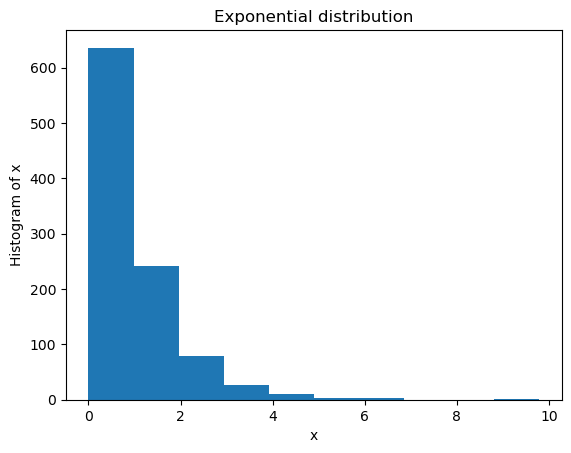

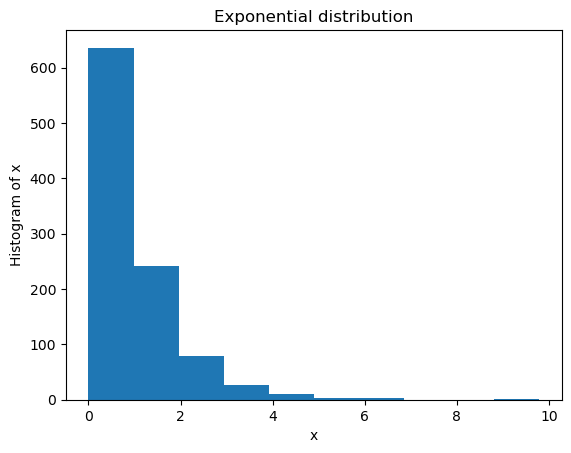

In [10]:
x = np.random.exponential(1., 1000)  # Generate 1000 samples according to an exponential distribution of parameter 1.
print(np.histogram(x))  # Returns two elements, the first one being the values of the histogram, and the second one the left extremities
# of the interval and the right extremity of the last interval (the construction is similar to the function hist in
# matplotlib.pyplot).

histo, bin_edges = np.histogram(x)
plt.figure()
plt.bar(bin_edges[:-1], histo, bin_edges[1] - bin_edges[0], align='edge')  # Draw vertical bars of left extremity given by the first
# argument, the height given by the second argument, the width given by the third argument, while align='edge' tells that the position we
# have given is indeed the left extremity of the rectangles.
plt.xlabel('x')
plt.ylabel('Histogram of x')
plt.title('Exponential distribution')
plt.show()

plt.figure()
plt.hist(x)
plt.xlabel('x')
plt.ylabel('Histogram of x')
plt.title('Exponential distribution')
plt.show()

In [11]:
x = np.random.random(100)
y = np.random.random(100)
print(np.cov(x, y))  # Compute the covariance matrix of the random samples x and y.
# The diagonal elements of the matrix are the variance of each random variable, while the off-diagonal elements are the covariance, namely
# the mean of the product of the two variables minus the product of the means.
# Note the slight different with the direct calculation, which comes from a difference in the normalization, in the cov function, the
# sums involved in the variances and covariances are divided by N - 1 (with N the size of the samples).
print(np.var(x), np.mean((x - np.mean(x)) * (y - np.mean(y))), np.var(y))

print(np.corrcoef(x, y))  # Computes the matrices of the Pearson correlation coefficient defined as P_{ij} = C_{ij}/sqrt(C_{ii}C_{jj}).
# By construction the diagonal elements are equal to 1, while the off-diagonal elements are the Pearson correlations of variables i and j.
print(np.mean((x - np.mean(x)) * (y - np.mean(y))) / np.sqrt(np.var(x) * np.var(y)))

[[0.07602738 0.01773915]
 [0.01773915 0.08708275]]
0.07526710170804016 0.0175617540824993 0.08621192364981844
[[1.         0.21801262]
 [0.21801262 1.        ]]
0.21801261644903142


In [12]:
import scipy.stats as stats
x = np.random.normal(size=1000)  # By default, the mean is 0 and the variance is 1.
print(stats.skew(x))  # Compute the skewness of x, defined as the ratio between the third order cumulant and the power 1.5 of the variance.
# The exact result is 0.
print(stats.kurtosis(x))  # Compute the kurtosis of x, defined as the ratio between the fourth order cumulant and the squared variance minus 3.
# The exact result is 0.

0.03419108984091339
-0.24154651663955562


<span style="color: #E43F6F; font-size: 22px;"><strong>III. Special functions and physical constants</strong></span>

<span style="color: #AB68B2; font-size: 18px; margin-left: 2em;"><i>1) Special functions</i></span>

The <span style="color: #AB68B2;"><i>module Special of the package SciPy</i></span> presents many special functions that you might need one day (in particular to model experimental or numerical data). Below are listed few examples but the full list is given in the online documentation: https://docs.scipy.org/doc/scipy/reference/special.html

<ul style="list-style: none">
  <li><span style="font-size:11px"> ▶</span> Airy functions, their derivatives and their zeros (very useful in Optics);</li>
  <li><span style="font-size:11px"> ▶</span> Bessel, Hankel functions, their derivatives, integrals and their zeros (very useful in the context of wave propagation or diffraction involving circular or cylindrical geometries);</li>
  <li><span style="font-size:11px"> ▶</span> Gamma function and other related functions (very useful in Statistical Physics or in High-Energy Physics);</li>
  <li><span style="font-size:11px"> ▶</span> Error function and other related functions (very useful in Statistical Physics);</li>
  <li><span style="font-size:11px"> ▶</span> Fresnel integrals (very useful in Optics);</li>
  <li><span style="font-size:11px"> ▶</span> Many polynomial functions, <i>e.g.,</i> Legendre, Laguerre, Hermite polynomials (very useful in Quantum Mechanics);</li>
  <li><span style="font-size:11px"> ▶</span> etc.</li>
</ul>

<table style="border: none;">
  <tr>
    <td style="vertical-align: middle;">
      <img src="programming.png" width="40">
    </td>
    <td style="vertical-align: middle; padding-left: 10px; text-align: center">
      <span style="color: #CF7EA0; font-size:16px;"><strong> Run the code below which illustrates the use of several special functions in Python. Add appropriate comments when required.</strong></span>
    </td>
  </tr>
</table>

In [13]:
import scipy.special as spe
x = np.arange(1, 10)
print(x)
print(spe.gamma(x))  # Compute the gamma function of x.
y = np.ones_like(x, dtype=int)
for i in range(1, x.size):
    y[i] = np.prod(x[:i])
print(y)  # Because elements of x are integers gamma(x)=(x-1)!

[1 2 3 4 5 6 7 8 9]
[1.000e+00 1.000e+00 2.000e+00 6.000e+00 2.400e+01 1.200e+02 7.200e+02
 5.040e+03 4.032e+04]
[    1     1     2     6    24   120   720  5040 40320]


<span style="color: #AB68B2; font-size: 18px; margin-left: 2em;"><i>2) Physical constants</i></span>

The <span style="color: #AB68B2;"><i>module Constants of the package SciPy</i></span> presents physical and mathematical constants, along with units that you might need one day (again to model experimental or numerical data). Below are listed few examples but the full list is given in the online documentation: https://docs.scipy.org/doc/scipy/reference/constants.html

<table style="border: none;">
  <tr>
    <td style="vertical-align: middle;">
      <img src="programming.png" width="40">
    </td>
    <td style="vertical-align: middle; padding-left: 10px; text-align: center">
      <span style="color: #CF7EA0; font-size:16px;"><strong> Run the code below which illustrates the use of several physical constants in Python. Add appropriate comments when required.</strong></span>
    </td>
  </tr>
</table>

In [14]:
import scipy.constants as constant
print(constant.pi, np.pi)
print(constant.golden, 0.5 * (1. + np.sqrt(5.)))  # Golden number.

print(constant.Avogadro)  # Avogadro number in mol^{-1}.
print(constant.Boltzmann)  # Boltzmann constant in J/K.
print(constant.Planck)  # Planck constant in J.s.

3.141592653589793 3.141592653589793
1.618033988749895 1.618033988749895
6.02214076e+23
1.380649e-23
6.62607015e-34


In [15]:
print(constant.fermi)  # 1fm = 10^{-15}m.
print(constant.angstrom)  # 1angstrom = 10^{-10}m.
print(constant.light_year, constant.c * 3600 * 24 * 365.25)  # Distance travelled by the light during 1 year.

1e-15
1e-10
9460730472580800.0 9460730472580800.0


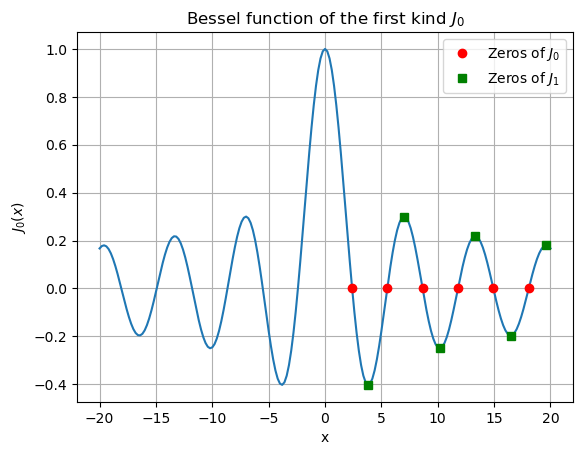

In [16]:
x = np.linspace(-20, 20, 201)
zeros_j0 = spe.jn_zeros(0, 6)  # Useful if you are interested in the vibrational modes in a cylindrical waveguide.
zeros_j1 = spe.jn_zeros(1, 6)
plt.figure()
plt.plot(x, spe.j0(x))
plt.plot(zeros_j0, np.zeros(zeros_j0.size), 'or', label=r'Zeros of $J_0$')
plt.plot(zeros_j1, spe.j0(zeros_j1), 'sg', label=r'Zeros of $J_1$')  # -J1 is the derivative of J0.
plt.xlabel('x')
plt.ylabel(r'$J_0(x)$')
plt.title(r'Bessel function of the first kind $J_0$')
plt.grid()
plt.legend()
plt.show()

3424821031470642.0
9.1093837139e-31
1.0545718176461565e-34


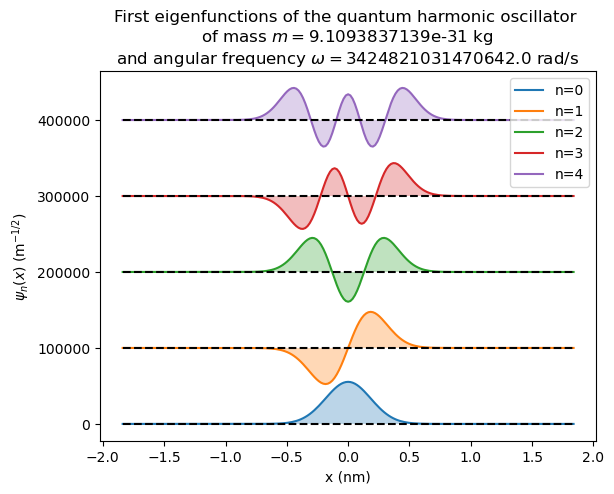

In [17]:
omega = 2. * np.pi * constant.nu2lambda(550 * constant.nano)  # Compute the angular frequency associated with a radiation of 550 nm.
print(omega)
m = constant.electron_mass  # Mass of the electron in kg.
print(m)
hbar = constant.hbar  # Reduced Planck constant.
print(hbar)


def eigenfunction_harmonic_oscillator(x, n):  # Return the value of the nth eigenfunction of the quantum harmonic oscillator at position x.
    return 1. / np.sqrt(2 ** n * spe.gamma(n + 1)) * \
           (m * omega / (np.pi * hbar)) ** 0.25 * \
           np.exp(- m * omega * x ** 2 / (2. * hbar)) * \
           spe.eval_hermite(n, np.sqrt(m * omega / hbar) * x)


plt.figure()
x = np.linspace(-10. * np.sqrt(hbar / (m * omega)), 10 * np.sqrt(hbar / (m * omega)), 201)  # The typical width of the wavefunction is
# sqrt(hbar / (m * omega)), do dimensional analysis.
shift = 1e5
for i in range(5):
    plt.plot(x * 1e9, eigenfunction_harmonic_oscillator(x, i) + i * shift, label='n=' + str(i))  # Plot the 5 first eigenfunctions.
    # Shift them vertically for visibility. The abscissae are given in nm.
    plt.plot(x * 1e9, np.full_like(x, i * shift), '--k')  # Plot an horizontal line to indicate the ordinate origin of each eigenfunction.
    plt.fill_between(x * 1e9, i * shift, eigenfunction_harmonic_oscillator(x, i) + i * shift, alpha=0.3)  # Fill the area between
    # the two sets of data given as arguments after the array of abscissae (here the baseline and the shifted eigenfunction).
plt.xlabel('x (nm)')
plt.ylabel(r'$\psi_n(x)$ (m$^{-1/2}$)')
plt.legend()
plt.title('First eigenfunctions of the quantum harmonic oscillator \n' +   # \n to go to line but does not work with r before the string.
          r'of mass $m=$' + str(m) + ' kg \n' +
          r'and angular frequency $\omega=$' + str(omega) + ' rad/s')
plt.show()

<span style="color: #E43F6F; font-size: 22px;"><strong>IV. Curve fitting</strong></span>

When you perform an experiment or a simulation, you may have the objective of validating a theoretical model. Said differently, you may want to confront the results from your experiment or simulation to the analytical prediction of the model. Usually, this comparison is done by analyzing if the data points (your results) follow a curve (the analytical prediction). The latter involves several adjustable parameters which are usually unknown. The value of these parameters may also be interesting in order to characterize your system.

As a result, the procedure of trying to overimpose data points with a model, called <span style="color: #AB68B2;"><i>curve fitting</i></span> is crucial. The <span style="color: #AB68B2;"><i>module Optimize of the package SciPy</i></span> presents several functions for curve fitting. In these lectures, we only focus on the function <tt>curve_fit</tt>, but the others (<tt>least_squares</tt> in particular which gives more freedom) are described in the online documentation: https://docs.scipy.org/doc/scipy/reference/optimize.html

We illustrate the procedure on the following example. An experiment consists in measuring the magnetic field in the center of a coil at a constant current intensity $I$. The laws of magnetostatics give that the magnetic field equals
$$B=\dfrac{\mu_0 NI}{\sqrt{D^2+\ell^2}},$$ with $D$ the diameter of the coil, $\ell$ its length, and $N$ the number of turns. You are given the results of $B$ (with their uncertainties) measured thanks to a teslameter, and of $I$ (with their uncertainties) measured thanks to an amperemeter. In the experiment, the coil had a diameter $D=(9.2\pm0.2)\,\mathrm{cm}$, a length $\ell=(41.0\pm0.2)\,\mathrm{cm}$ and a number of turns $N=120\pm1$. The function $B(I)$ is therefore expected to be a linear function, of slope $a=\mu_0N/\sqrt{\ell^2+D^2}$, with an expected value $a_\mathrm{th}=(0.359\pm0.005)\, \mathrm{mT/A}$, where the uncertainty is obtained via propagation of uncertainties
$$\frac{u(a_\mathrm{th})}{a_\mathrm{th}}=\frac{u(N)}{N}+\frac{\ell u(\ell)+Du(D)}{\ell^2+D^2}.$$

The objective is to validate the model obtained from the law of magnetostatics theory, which involves approximations or assumptions that may not be verified experimentally (the magnetic field is not precisely measured at the center of the coil, there are residual magnetic fields in the room, etc.).

<table style="border: none;">
  <tr>
    <td style="vertical-align: middle;">
      <img src="programming.png" width="40">
    </td>
    <td style="vertical-align: middle; padding-left: 10px; text-align: center">
      <span style="color: #CF7EA0; font-size:16px;"><strong> Run the code below to understand how to fit a curve to a set of data in Python. Add appropriate comments when required.</strong></span>
    </td>
  </tr>
</table>

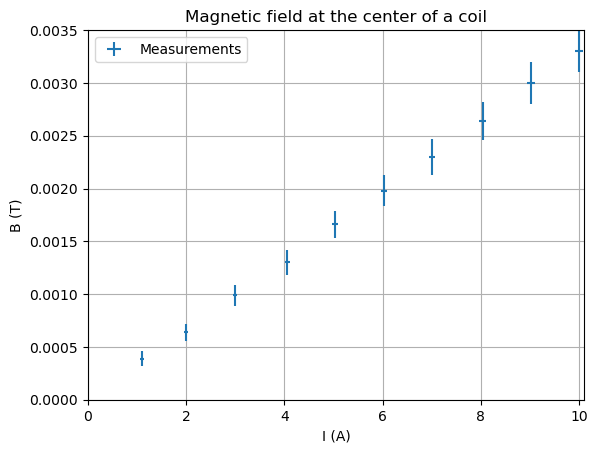

In [18]:
I = np.array([1.10, 2.00, 2.99, 4.06, 5.03, 6.02, 7.00, 8.04, 9.02, 9.99])  # Intensity of the current in A.
uI = np.array([0.04, 0.04, 0.04, 0.05, 0.06, 0.06, 0.06, 0.07, 0.08, 0.08])  # Uncertainty on the intensity in A.
B = np.array([0.39, 0.64, 0.99, 1.30, 1.66, 1.98, 2.30, 2.64, 3.0, 3.3])  # Magnetic field in mT.
uB = np.array([0.07, 0.08, 0.10, 0.12, 0.13, 0.15, 0.17, 0.18, 0.2, 0.2])  # Uncertainty on the magnetic field in mT.
B *= 1e-3  # We convert the magnetic field in T (safer to avoid conversion mistakes).
uB *= 1e-3  # We convert the uncertainty on the magnetic field in T (safer to avoid conversion mistakes).
D = 9.2e-2  # Diameter of the coil in m.
uD = 0.2e-2  # Uncertainty on the diameter in m.
l = 0.410  # Lenght of the coil in m.
ul = 0.2e-2  # Uncertainty on the length in m.
N = 120  # Number of turns.
uN = 1  # Uncertainty on the number of turns.

plt.figure()
plt.errorbar(I, B, uB, uI, linestyle='', label='Measurements')  # Plot data with errorbars. Be careful that you must give first the
# errorbars on the ordinates, and then the errorbar on the abscissae.
plt.xlabel('I (A)')
plt.ylabel('B (T)')
plt.title('Magnetic field at the center of a coil')
plt.legend()
plt.axis([0, 10.1, 0, 3.5e-3])
plt.grid()
plt.show()

(array([ 3.30565579e-04, -6.37482306e-06]), array([[ 5.30526773e-12, -2.93116268e-11],
       [-2.93116268e-11,  2.05302288e-10]]))


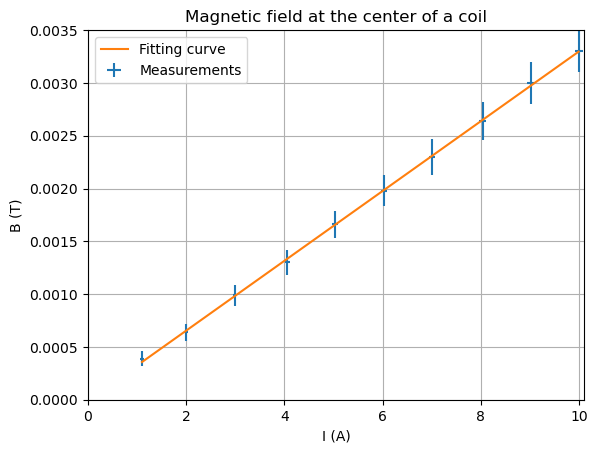

In [19]:
# Fitting procedure without considering the errorbars and without help to guess the adjustable parameters.
import scipy.optimize as opt


def affine_function(x, a, b):  # Fitting function. The variation of B with I is linear, but to account for residual magnetic fields, we add
    # an intercept. For the function curve_fit, the argument of the mathematical function must be the first argument of the Python function,
    # and the adjustable parameters of the model must be separate other arguments of the Python function.
    return a * x + b


print(opt.curve_fit(affine_function, I, B))  # The function returns two arrays, the first one is the array of best adjustable parameters
# (a,b), while the second argument is the covariant matrix of the fitting parameters (see later when we consider errorbars).
popt, pcov = opt.curve_fit(affine_function, I, B)
a = popt[0]
b = popt[1]

plt.figure()
plt.errorbar(I, B, uB, uI, linestyle='', label='Measurements')
plt.plot(I, affine_function(I, a, b), label='Fitting curve')
plt.xlabel('I (A)')
plt.ylabel('B (T)')
plt.title('Magnetic field at the center of a coil')
plt.legend()
plt.axis([0, 10.1, 0, 3.5e-3])
plt.grid()
plt.show()

a= 0.00033056557786609943 T/A,   a_th= 0.00035887237635885553 T/A
b= -6.3748172213222165e-06 T,   b_th= 0 T


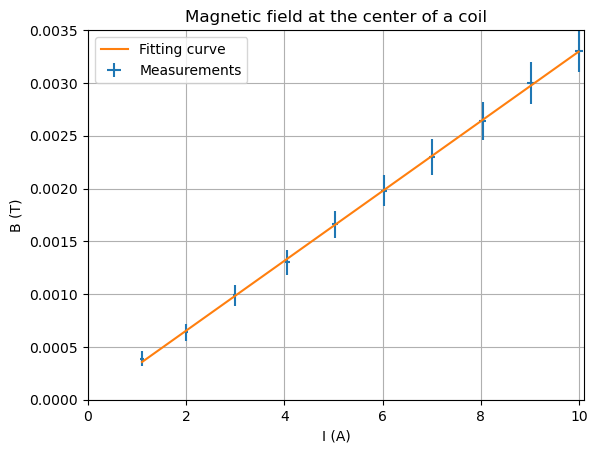

In [20]:
# Fitting procedure without considering the errorbars but with help to guess the adjustable parameters.
def affine_function(x, a, b):
    return a * x + b


a_th = constant.mu_0 * N / np.sqrt(l ** 2 + D ** 2)  # Expected value for the slope.
popt, pcov = opt.curve_fit(affine_function, I, B, p0=np.array([a_th, 0.]))  # If we have rough estimates of the adjustable parameters,
# we can give them to the function: this is crucial if you try to fit a nonlinear function (less crucial for linear functions).
a = popt[0]
b = popt[1]
print('a=', a, 'T/A,   a_th=', a_th, 'T/A')  # The values of a and b look reasonable but without taking into account errorbars.
print('b=', b, 'T,   b_th=', 0, 'T')  # We cannot conclude on the validity of the model.

plt.figure()
plt.errorbar(I, B, uB, uI, linestyle='', label='Measurements')
plt.plot(I, affine_function(I, a, b), label='Fitting curve')
plt.xlabel('I (A)')
plt.ylabel('B (T)')
plt.title('Magnetic field at the center of a coil')
plt.legend()
plt.axis([0, 10.1, 0, 3.5e-3])
plt.grid()
plt.show()

a=( 0.3278922062724227 +/- 0.014330540813255051 ) mT/A
a_th=( 0.35887237635885555 +/- 0.005031267517875478 ) mT/A
b=( 0.006891769518391891 +/- 0.062486775309015474 ) mT
b_th= 0 T


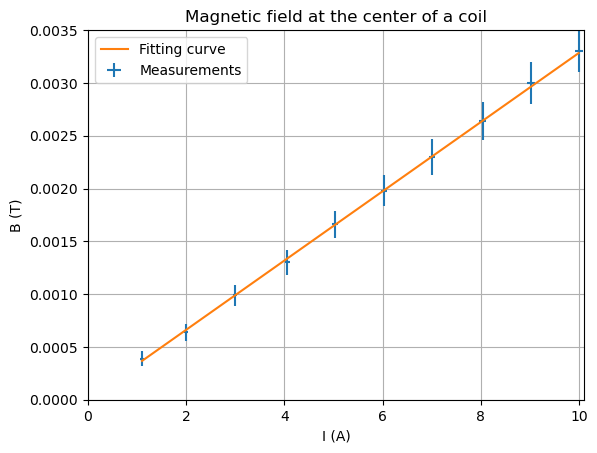

In [21]:
# Fitting procedure by considering the errorbars on the ordinates (here there are dominant so this is reasonable).
def affine_function(x, a, b):
    return a * x + b


popt, pcov = opt.curve_fit(affine_function, I, B, sigma=uB, p0=np.array([a_th, 0.]), absolute_sigma=True)
# With the variable sigma, you can give the errorbars on the ordinates only. Besides, we add absolute_sigma=True to indicate that
# the absolute value of the errorbars are relevant, not only their relative value.
a = popt[0]
b = popt[1]
ua = np.sqrt(pcov[0, 0])  # In case you provide errorbars for your measurements, the covariance matrix has a precise meaning:
ub = np.sqrt(pcov[1, 1])  # its diagonal elements are the variance of each fitting variable
# (under some assumptions that will not be discussed here, the square root gives their uncertainty).

ua_th = a_th * (uN / N + (l * ul + D * uD) / (l ** 2 + D ** 2))  # Uncertainty on the expected slope
# (obtained via propagation of uncertainties).
print('a=(', a * 1e3, '+/-', ua * 1e3, ') mT/A')
print('a_th=(', a_th * 1e3, '+/-', ua_th * 1e3, ') mT/A')  # The values of a do not coincide despite the errorbars.
print('b=(', b * 1e3, '+/-', ub * 1e3, ') mT')
print('b_th= 0 T')  # The linear model is justified because 0 is an acceptable value for the intercept.

plt.figure()
plt.errorbar(I, B, uB, uI, linestyle='', label='Measurements')
plt.plot(I, affine_function(I, a, b), label='Fitting curve')
plt.xlabel('I (A)')
plt.ylabel('B (T)')
plt.title('Magnetic field at the center of a coil')
plt.legend()
plt.axis([0, 10.1, 0, 3.5e-3])
plt.grid()
plt.show()

<span style="color: #E43F6F; font-size: 22px;"><strong>V. Importing and exporting data</strong></span>

<span style="color: #AB68B2; font-size: 18px; margin-left: 2em;"><i>1) Importing data</i></span>

Experimental data or data obtained from a simulation are often obtained independently from the Python code you use to analyse your results. As a result, you should be able to import your data saved on your computer as a <tt>.txt</tt> or <tt>.csv</tt> file.

If your data are stored in a file as $N$ columns, all having $M$ lines, then NumPy has two functions which allow you to import your data easily: <tt>loadtxt</tt> or <tt>genfromtxt</tt>. In these lecture notes, we focus on the function <tt>genfromtxt</tt> which gives more flexibility. Look at the online documentation to understand how to use it: https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html

<span style="color: #AB68B2; font-size: 18px; margin-left: 2em;"><i>2) Exporting data</i></span>

<span style="color: #1BBAC6; font-size: 16px; margin-left: 4em;"><i>a) Exporting tables of data</i></span>

To save arrays of data with $N$ columns, all having $M$ lines, the function <tt>savetxt</tt> of the package NumPy can be used. This function gives you flexibility, in particular to add comments, change the delimiter between data, etc.). For more details, consult the online documentation: https://numpy.org/doc/stable/reference/generated/numpy.savetxt.html

<span style="color: #1BBAC6; font-size: 16px; margin-left: 4em;"><i>b) Saving figures</i></span>

To save figures, you can use the function <tt>savefig</tt> of the module Pyplot of the package Matplotlib. Many options can be customized, and you can consult the online documentation for more details: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html

<span style="color: #E43F6F; font-size: 22px;"><strong>VI. Exercises</strong></span>

<span style="color: #AB68B2; font-size: 18px; margin-left: 2em;"><i>Exercise 1:</i></span>

We consider a random walker who takes steps of unit length along an axis. The walker starts at the origin $x = 0$ and the first step is chosen at random to the right or to the left with probability $1/2$ in each case. If the first step is to the right, the position after this first step is $x = +1$. The next step is then chosen, again with probability $1/2$ for each direction. This process is then repeated.

1) Draw the curve representing the position of the walker as a function of the number of steps. As we can consider that there is one step per unit of time, this is equivalent to plotting the position versus time.

2) Draw the curve which represents the square of the walker's distance from the origin as a function of time.

3) Now consider that there are 500 walkers. Plot on the same graph the curves which represent the square of the walkers distance from the origin as a function of time for all walkers. Represent also the curve which represents the average of the square of the distance of the walkers from the origin (called the Mean-Squared Displacement or MSD) as a function of time. You must plot the curves for all walkers in black and a small opacity, and the average in red.

4) The MSD $\Delta^2$ varies linearly with time $\Delta^2=2Dt$, with $D$ the diffusion coefficient of the walker. Perform a linear fit of the MSD and compare the estimated value of $D$ with the theoretical prediction $D=1/2$.

5) Plot the result of the fit and the MSD on a new graph. The graph must indicate the value of $D$ obtained from the fitting procedure, and also the Pearson correlation coefficient of the MSD and the number of steps (to confirm the linear dependency). If you do not remember the mathematical definition of the Pearson correlation coefficient, look on Wikipedia.

6) Save the result of the MSD and of the fit in a <tt>.txt</tt> file called <tt>MSD_Brownian.txt</tt>. The structure of the file is indicated below, the first line must explicitely indicate the content of each column, and the different columns must be separated by a 7 spaces:
#Number of steps     MSD     Linear fit

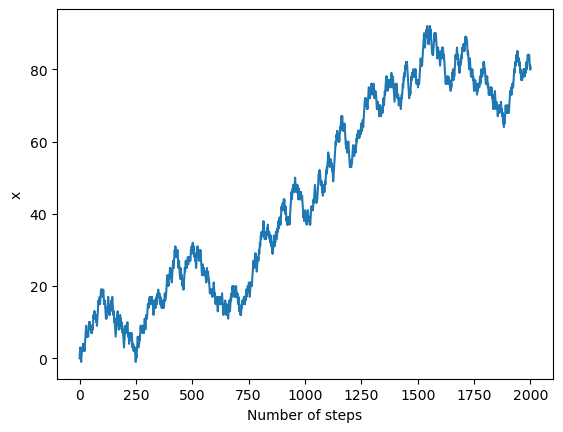

In [22]:
n = 2000  # Number of steps
kicks = np.random.choice(np.array([-1, 1]), size=n)  # Array with entries +1 (right kick) or -1 (left kick) with probability 1/2
# for each entry.
x = np.cumsum(kicks)  # At a given time, the position is the sum of positive kicks - the sum of negative kicks.
x = np.concatenate((np.array([0]), x))  # We add the initial position, which is x = 0.
plt.figure()
plt.plot(x)
plt.xlabel('Number of steps')
plt.ylabel('x')
plt.show()

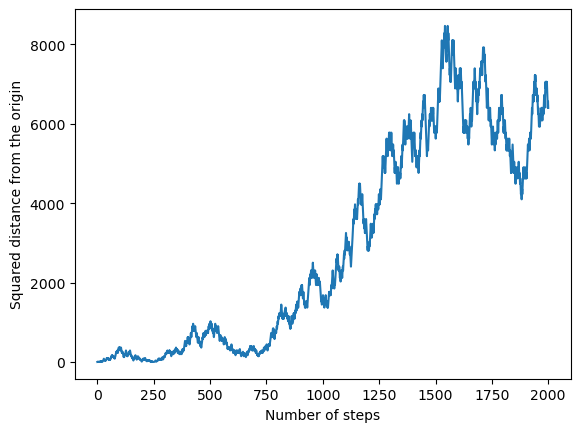

In [23]:
plt.figure()
plt.plot(x ** 2)
plt.xlabel('Number of steps')
plt.ylabel('Squared distance from the origin')
plt.show()

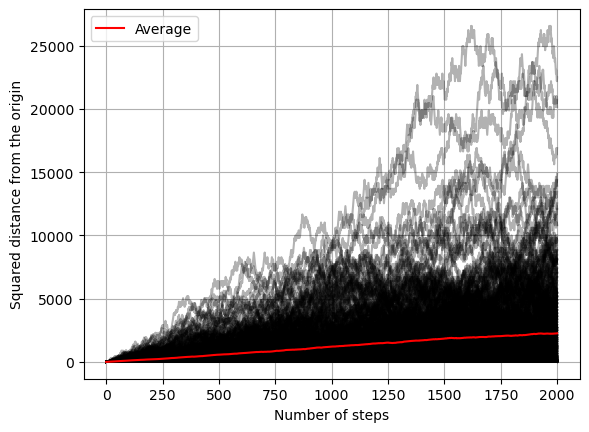

In [24]:
nwalker = 500  # Number of walkers
kicks = np.random.choice(np.array([-1, 1]), size=(n, nwalker))  # Array of n rows and nwalker columns.
x = np.cumsum(kicks, axis=0)  # Each column corresponds to the trajectory of 1 walker.
x = np.vstack((np.zeros(nwalker), x))  # We add the initial position for all walkers.
MSD = np.mean(x ** 2, axis=1)  # We compute the MSD by averaging over all walkers (average over the columns on each row).
plt.figure()
plt.plot(x ** 2, 'k', alpha=0.3)  # Each column corresponds to the trajectory of 1 walker, so the function plot plots every column
# separately.
plt.plot(MSD, 'r', label='Average')
plt.grid()
plt.xlabel('Number of steps')
plt.ylabel('Squared distance from the origin')
plt.legend()
plt.show()

In [25]:
def linear(x, a):
    return 2. * a * x


steps = np.arange(n + 1)
popt, pcov = opt.curve_fit(linear, steps, MSD, p0=np.array([0.5]))  # We use the theoretical result as guess.
D = popt[0]  # Extract the diffusion constant.

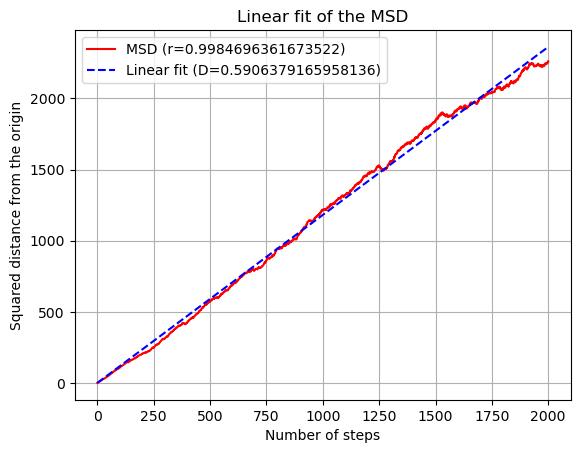

In [26]:
linear_fit = linear(steps, D)  # Best fit.
pearson_correlation = np.corrcoef(steps, MSD)[1, 0]  # Compute the Pearson correlation (symmetric) matrix between the two variables
# (Look on the webpage). The diagonal elements are equal to 1 by construction, and here we are only interested in the off-diagonal element.
plt.figure()
plt.plot(steps, MSD, 'r', label='MSD (r=' + str(pearson_correlation) + ')')
plt.plot(steps, linear_fit, 'b--', label='Linear fit (D=' + str(D) + ')')
plt.grid()
plt.title('Linear fit of the MSD')
plt.xlabel('Number of steps')
plt.ylabel('Squared distance from the origin')
plt.legend()
plt.show()

In [27]:
np.savetxt('MSD_Brownian.txt', np.vstack((steps, MSD, linear_fit)).T, header='Number of steps   MSD   Linear fit', delimiter='       ')

<span style="color: #AB68B2; font-size: 18px; margin-left: 2em;"><i>Exercise 2:</i></span>

Write a program which performs the following tasks:

1) Open the file <tt>signal3.txt</tt> which contains the time series of a signal $s(t)$ (the first column gives the abscissae, the second column gives the ordinates).

2) Plot the signal $s(t)$.

3) Compute the DFT $\tilde{s}(f)$ of this signal.

4) Plot the power spectrum $\mathcal{S}(f)=\vert\tilde{s}(f)\vert^2$ of the signal. What should be done to eliminate the maximum at zero frequency?

5) Measure the three characteristic strictly positive frequencies of the signal. This question does not require any advanced function available in <tt>scipy.optimize</tt> or <tt>scipy.signal</tt>. What is the value of the spectrum for these frequencies?

6) Mark the locations of the characteristic frequencies on the plot of the spectrum and allow them to be distinguishable. Save the plot as a <tt>.pdf</tt> file.

In [28]:
signal = np.genfromtxt('signal3.txt', delimiter=',', skip_header=1)  # Indicate the delimiter (,) and that the first line must be skipped.
t = signal[:, 0]  # The first column gives the time (abscissae).
s = signal[:, 1]  # The second column gives the values of the signal (ordinates).

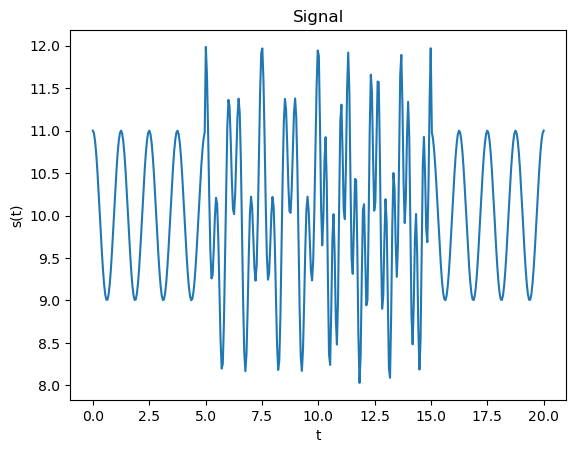

In [29]:
plt.figure()
plt.plot(t, s)
plt.xlabel('t')
plt.ylabel('s(t)')
plt.title('Signal')
plt.show()

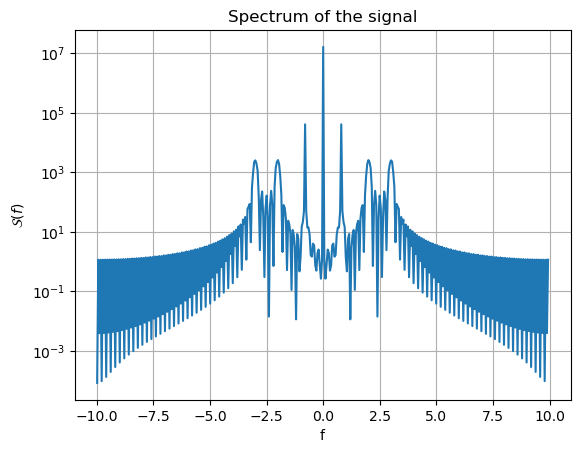

In [30]:
FT_s = np.fft.fftshift(np.fft.fft(s))  # The fftshift command allows you to put the zero frequency in the middle of the interval.
freq = np.fft.fftshift(np.fft.fftfreq(s.size, t[1] - t[0]))
spectrum = np.abs(FT_s) ** 2  # Compute the spectrum as the squared modulus of the Fourier transform.
plt.figure()
plt.plot(freq, spectrum)
plt.yscale('log')
plt.xlabel('f')
plt.ylabel(r'$\mathcal{S}(f)$')
plt.grid()
plt.title('Spectrum of the signal')
plt.show()

In [31]:
FT_reduced_s = np.fft.fftshift(np.fft.fft(s - np.mean(s)))  # To remove the peak at 0 frequency, we have to substract the mean to
# the signal.
spectrum_reduced = np.abs(FT_reduced_s) ** 2

In [32]:
max_freq = np.zeros(3)  # Array of frequencies where the spectrum is maximum.
max_spectrum = np.zeros(3)  # Array of local maxima of the spectrum.
spectrum_copy = np.copy(spectrum_reduced)  # To avoid modifying the spectrum.
for i in range(3):
    j = np.argmax(spectrum_copy[s.size // 2:])
    j += s.size // 2  # The argmax command finds the maximum of the array given but its first element (position 0) is the s.size // 2 th
    # element of the original array.
    max_freq[i] = freq[j]
    max_spectrum[i] = spectrum_copy[j]
    spectrum_copy[j] = 0.

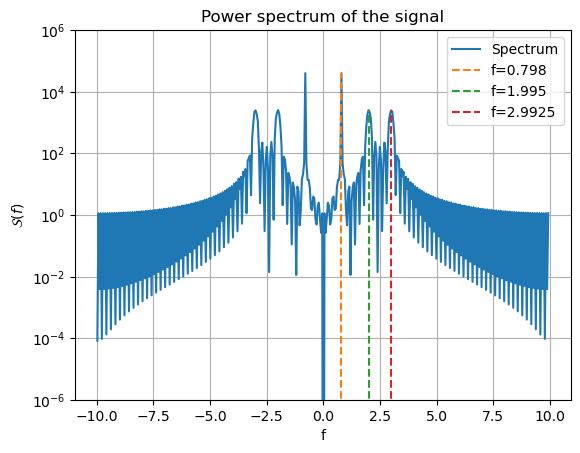

In [33]:
plt.figure()
plt.plot(freq, spectrum_reduced, label='Spectrum')
plt.plot(np.tile(max_freq, (1, 2)).reshape((2, 3)), np.vstack((np.zeros(3), max_spectrum)), '--',
         label='f=' + np.asarray(max_freq, dtype=str))  # To write the labels, we convert the frequency array into an array of strings.
# We create 2D arrays.
# For the abscissae, each column has its two entries equal to one characteristic frequency, and the characteristic frequency changes from
# one column to the next.
# For the ordinates, each column has two values, which are 0 and the value of the spectrum at the corresponding characteristic frequency.
# It will result in three plots corresponding to vertical lines from 0 to the maximum of the spectrum.
plt.yscale('log')
plt.xlabel('f')
plt.ylabel(r'$\mathcal{S}(f)$')
plt.ylim(1e-6, 1e6)
plt.grid()
plt.legend()
plt.title('Power spectrum of the signal')
plt.savefig('spectrum_signal.pdf')
plt.show()

<span style="color: #AB68B2; font-size: 18px; margin-left: 2em;"><i>Exercise 3:</i></span>

Write a program which performs the following tasks.

1) Generate $n=100\, 000$ independent samples of a random variable $X$ drawn from a Gaussian distribution of mean $\mu=3$ and standard deviation $\sigma=5$. Verify that the values of the mean and of the variance are close to their expectations.

2) Compute and plot the probability density function of $X$ (do not use the function <tt>matplotlib.pyplot.hist</tt>). Plot on the same graph the analytical prediction. We recall that the probability density function of a Gaussian random variable is given by
$$f(x)=\dfrac{1}{\sqrt{2\pi\sigma^2}}\exp\left[-\dfrac{(x-\mu)^2}{2\sigma^2}\right].$$

3) The cumulative distribution function (CDF) of a random variable is defined as $P(X\leq x) = \displaystyle \int_{-\infty}^{x}\mathrm{d}y\,f(y)$. Compute the CDF from the histogram.

4) Plot on the same graph the CDF computed from the histogram and its analytical expression. We recall that for a Gaussian distribution, the cumulative distribution function (CDF) reads $$P(X\leq x) = \dfrac{1}{2}\left[1+\mathrm{erf}\left(\dfrac{x-\mu}{\sqrt{2\sigma^2}}\right)\right],$$ where $\mathrm{erf}(x)=\displaystyle\frac{2}{\sqrt{\pi}}\int_0^x\mathrm{d}y\,e^{-y^2}$ is the error function.

In [34]:
mu = 3.
sigma = 5.
x = np.random.normal(mu, sigma, size=100000)
print(np.mean(x))  # Expected value = 3.
print(np.var(x))  # Expected value = 25.

2.9934922108955835
25.036699731007694


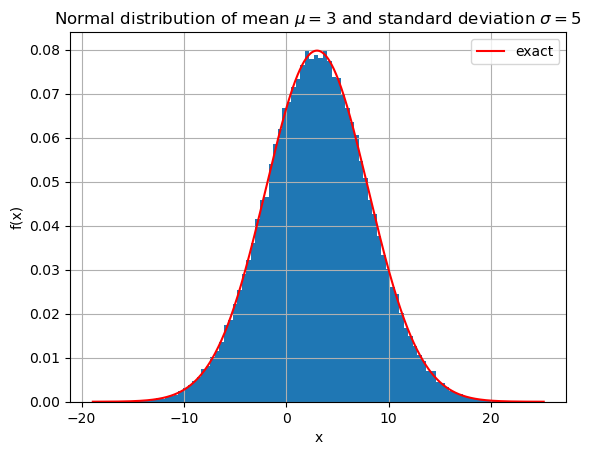

In [35]:
histo, bin_edges = np.histogram(x, bins=100, density=True)
plt.bar(bin_edges[:-1], height=histo, width=bin_edges[1] - bin_edges[0], align='edge')  # Draw bars where the position is given by the
# first argument, the height by the second argument, and the width by the third argument. The align='edge' means that the position we have
# given is the left position of the bar.
xx = np.linspace(bin_edges[0], bin_edges[-1], 1000,)  # We create an array of equally spaced values in the range of the histogram
# to compute the Gaussian distribution.
density = 1. / np.sqrt(2. * np.pi * sigma ** 2) * np.exp(-(xx - mu) ** 2 / (2. * sigma ** 2))
plt.plot(xx, density, 'r-', label='exact')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.legend()
plt.title(r'Normal distribution of mean $\mu=3$ and standard deviation $\sigma = 5$')
plt.show()

In [36]:
cdf_histo = np.cumsum(histo)  # We approximate the integral via the Riemann sum so we just have to perform a cumulative sum, and then to
# multiply by the width of each interval in the histogram.
cdf_histo *= (bin_edges[1] - bin_edges[0])

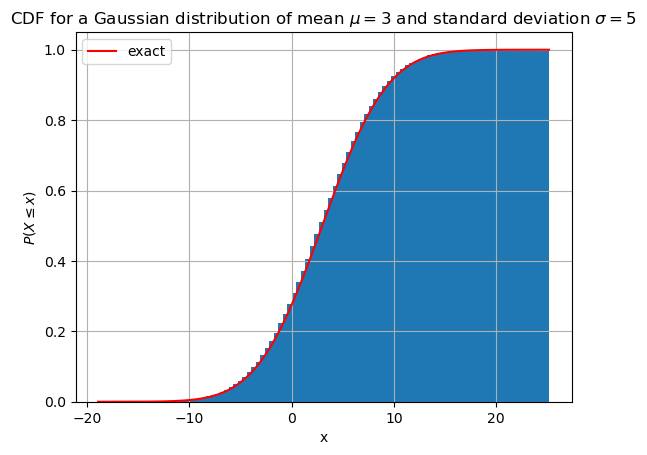

In [37]:
cdf = 0.5 * (1. + spe.erf((xx - mu) / np.sqrt(2. * sigma ** 2)))
plt.bar(bin_edges[:-1], height=cdf_histo, width=bin_edges[1] - bin_edges[0], align='edge')
plt.plot(xx, cdf, 'r-', label='exact')
plt.xlabel('x')
plt.ylabel(r'$P(X\leq x)$')
plt.grid()
plt.legend()
plt.title(r'CDF for a Gaussian distribution of mean $\mu=3$ and standard deviation $\sigma = 5$')
plt.show()